In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('income.csv')
df.sample(5)

,Name,Age,Income($)
3,Ismail,28,60000
6,David,41,160000
4,Kory,42,150000
18,Nick,43,64000
14,Stark,29,49500


In [3]:
df.shape

(22, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


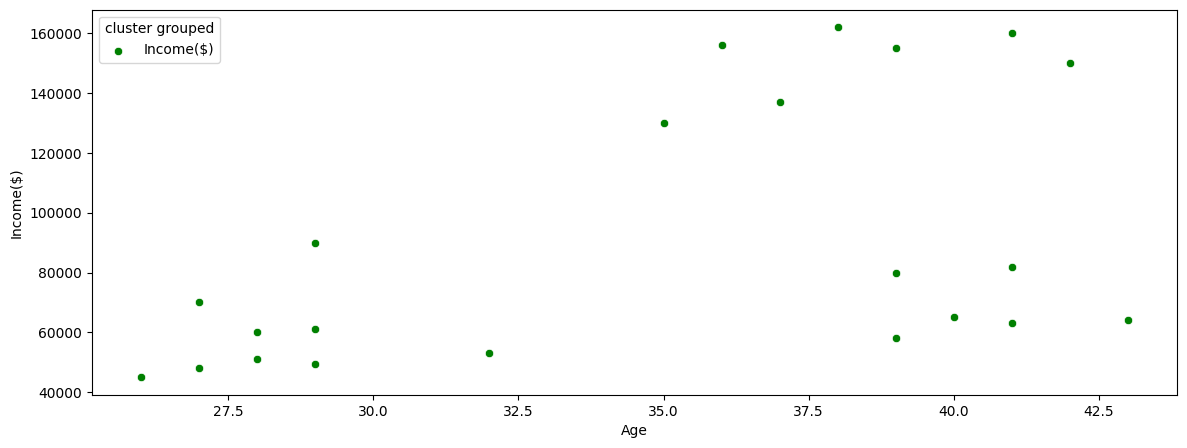

In [6]:
plt.figure(figsize = (14,5))
sns.scatterplot(data=df, x='Age', y='Income($)',color = 'g')
plt.legend(title = 'cluster grouped', labels=['Income($)', 'Income($)','Income($)'], loc='upper left')
plt.show()

In [7]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
df['cluster'] = y_predicted 
df.sample(5)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
20,Sid,41,82000,0
4,Kory,42,150000,1
11,Tom,26,45000,0
7,Andrea,38,162000,1


In [9]:
# now we have custer points 
# here we have the 2d points 
km.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.60000000e+01, 1.33500000e+05]])

In [10]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

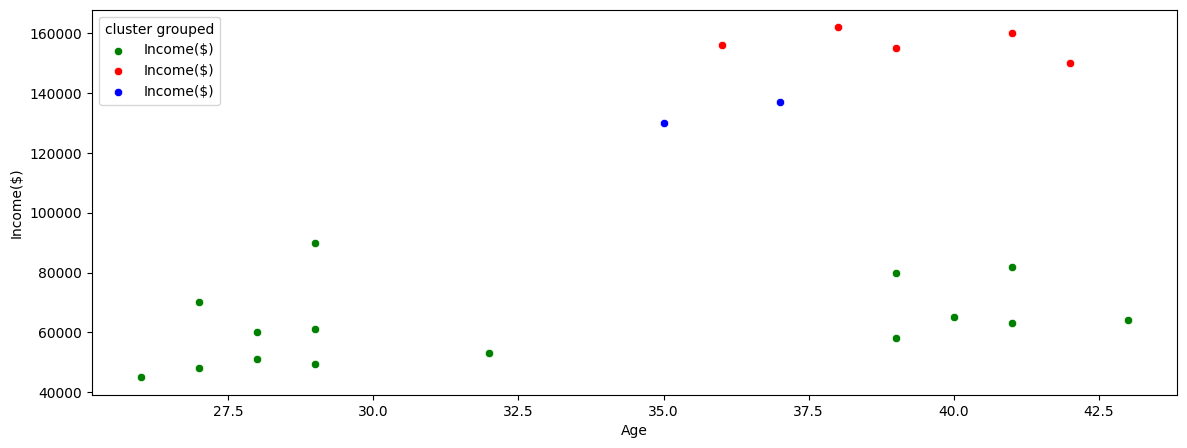

In [11]:
plt.figure(figsize = (14,5))
sns.scatterplot(data=df1, x='Age', y='Income($)',color = 'g')
sns.scatterplot(data=df2, x='Age', y='Income($)',color = 'r')
sns.scatterplot(data=df3, x='Age', y='Income($)',color = 'b')
plt.legend(title = 'cluster grouped', labels=['Income($)', 'Income($)','Income($)'], loc='upper left')
plt.show() 

In [12]:
# here we scaling into zero to one range
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
# here the age we converting into standed range in the given 0 to 1

df.head()
# here the Income data is converted into the staned range 

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [16]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

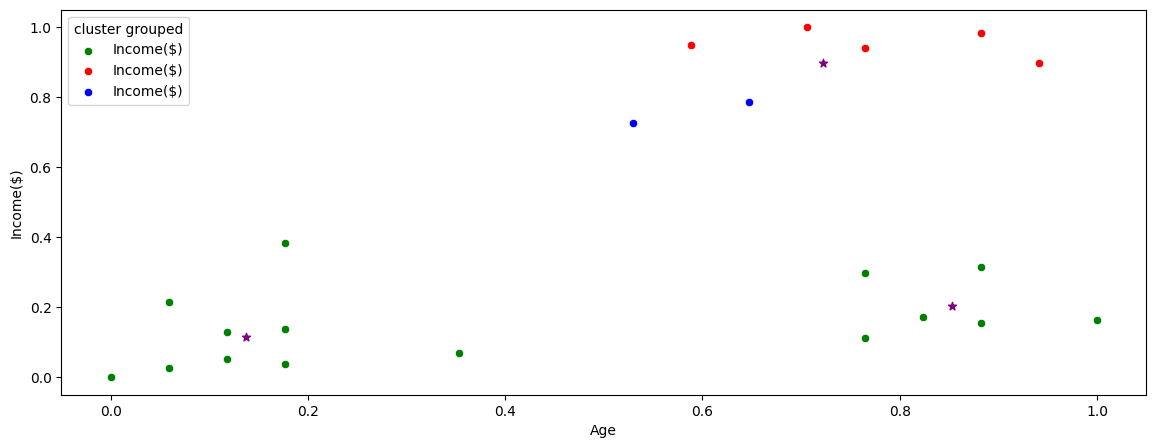

In [17]:
plt.figure(figsize = (14,5))
sns.scatterplot(data=df1, x='Age', y='Income($)',color = 'g')
sns.scatterplot(data=df2, x='Age', y='Income($)',color = 'r')
sns.scatterplot(data=df3, x='Age', y='Income($)',color = 'b')
plt.legend(title = 'cluster grouped', labels=['Income($)', 'Income($)','Income($)'], loc='upper left')

# here using the centroyed in this with 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ='purple',marker = "*",label = 'centroid' )
plt.show() 

In [18]:
sse = []

k_rng = range(1,10)

for k in k_rng :
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [19]:
sse # here we find the sum of squre of error 

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.3071350418475292,
 0.2203764169077067,
 0.19963784443145205,
 0.1925323157456509,
 0.10188787724979426]

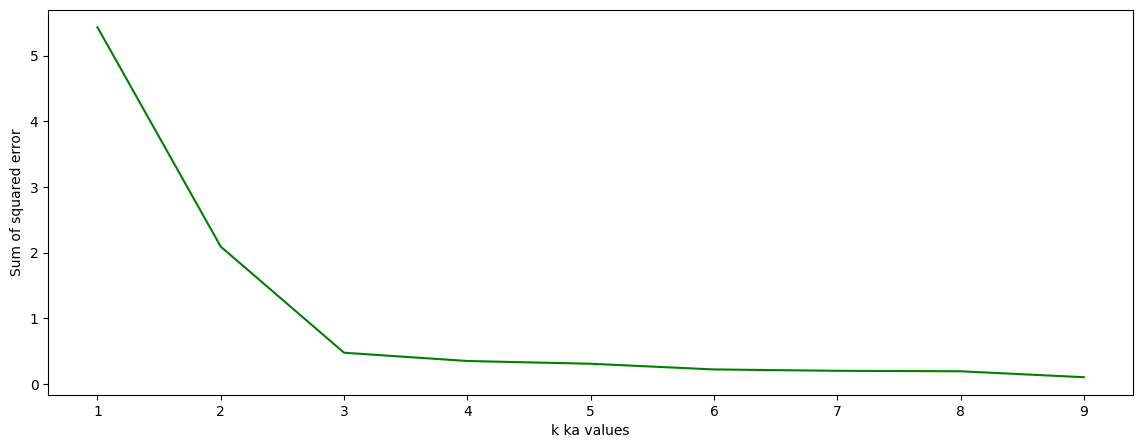

In [28]:
# here we done the labo plot in the given  
plt.figure(figsize = (14,5))
plt.plot(k_rng,sse,color = 'g')
plt.xlabel('k ka values')
plt.ylabel('Sum of squared error')
plt.show()